In [1]:
import sys
sys.path.append('/cluster/sj1/bb_opt/scripts')

In [2]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collect_stats as cs

%matplotlib inline

In [3]:
import collect_stats as cs

In [4]:
exp_folder = '/cluster/sj1/bb_opt/experiments/imdbwiki'
batches = [20, 50, 200]
num_acks = 50

In [5]:
filenames = ['wiki']

In [6]:
def sigmoid(x, exp=np.exp):
  return 1.0 / (1.0 + exp(-x))

In [23]:
arrs = {}

In [363]:
to_read = {
    #'ensemble0/o_max_std_5k_reg_uniform_dist_g0002051020_': [None, 'e0_udist_g0002051020'],
    #'ensemble0/o_max_std_5k_reg_uniform_dist_g000205102030_': [None, 'e0_5k_udist_g000205102030'],
    #'ensemble0/o_max_std_2k_reg_g0002051020_': [None, 'e0_2k_g0002051020_'],
    #'ensemble0/o_max_std_2k_reg_udist_g0002051020_': [None, 'e0_2k_g0002051020'],
    #'ensemble0/o_max_std_3k_reg_uniform_dist_g0002051020_': [None, 'e0_3k_udist_g0002051020'],
    #'ensemble0/o_max_std_8k_reg_udist_g0001020510_': [None, 'e0_8k_g0001020510'],
    #'ensemble0/o_max_std_8k_reg_udist_g0002051020_': [None, 'e0_8k_g0002051020'],
    'ensemble0/o_max_std_8k_reg_invar_g0002051020_': [None, 'e0_8k_invar_g0002051020'],
    'ensemble0/o_max_std_8k_reg_inoutvar_g0002051020_': [None, 'e0_8k_inoutvar_g0002051020'],
}


In [364]:
for k in to_read:
    arrs[k] = to_read[k]
for experiment in to_read:
    print('reading', experiment)
    arrs[experiment][0] = cs.get_data(exp_folder, experiment, batches, num_samples=100)

reading ensemble0/o_max_std_8k_reg_invar_g0002051020_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading ensemble0/o_max_std_8k_reg_inoutvar_g0002051020_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5


In [362]:
to_eval = [
    'ensemble0/o_max_std_2k_reg_udist_g0002051020_',
    'ensemble0/o_max_std_8k_reg_udist_g0001020510_',
    'ensemble0/o_max_std_8k_reg_udist_g0002051020_',
    'ensemble0/o_max_std_8k_reg_invar_g0002051020_',
    'ensemble0/o_max_std_8k_reg_inoutvar_g0002051020_',
]

In [243]:
test_rmse_fn = lambda x, filename : x['test_pred_stats']['rmse']
g0_test_rmse_fn = lambda x, filename : x['zero_gamma_test_pred_stats']['rmse']
test_log_prob_fn = lambda x, filename : x['test_pred_stats']['log_prob']
g0_test_log_prob_fn = lambda x, filename : x['zero_gamma_test_pred_stats']['log_prob']
test_std_fn = lambda x, filename : x['test_pred_stats']['std']
bs_test_rmse_fn = lambda x, filename : x['test_pred_stats']['baseline_rmse']
ood_rmse_fn = lambda x, filename : x['ood_pred_stats']['rmse']
g0_ood_rmse_fn = lambda x, filename : x['zero_gamma_ood_pred_stats']['rmse']
ood_log_prob_fn = lambda x, filename : x['ood_pred_stats']['log_prob']
g0_ood_log_prob_fn = lambda x, filename : x['zero_gamma_ood_pred_stats']['log_prob']
bs_ood_rmse_fn = lambda x, filename : x['test_pred_stats']['baseline_rmse']

In [368]:
dist = "test"
dist = "ood"
prop = "log_prob"
#prop = "rmse"

fn = [globals()[dist+"_" + prop + "_fn"], globals()["g0_" + dist + "_" + prop + "_fn"]]
cs.prop_test2(50, 
             filenames,
             fn, 
             arrs, 
             to_eval[-2],
             0,
             pval_threshold=1, 
             paired_test=True,
            )

comparing <lambda> <lambda>
wiki 0.36372535776614145 -0.008172548841685057 -0.006600702088326216 1 	 (std: 0.12158977444660975 0.12345695806119351 )
combined pval: nan vs 0.36373
count: 1/1


In [218]:
cs.prop_test(50, 
             filenames,
             test_log_prob_fn, 
             arrs, 
             [to_eval[-2], to_eval[-1]],
             0,
             pval_threshold=1, 
             paired_test=False,
            )

comparing e0_8k e0_8k_g0001020510
wiki 0.12312718677302957 -0.3122437961399555 -0.0974068275342385 1 	 (std: 0.13199008591677658 0.4185100437209044 )
combined pval: nan vs 0.12313
count: 1/1


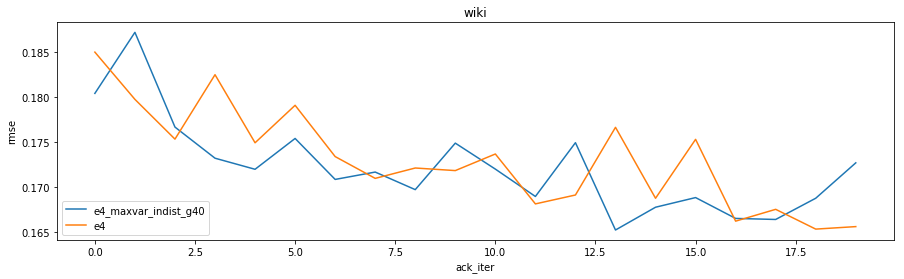

In [329]:
cs.plot_data_vs_ack_iter(
    50,
    filenames,
    'avg_seeds',
    'rmse',
    test_rmse_fn,
    20,
    arrs,
    to_eval,
    legend_loc=3,
)

/cluster/sj1/bb_opt/scripts/collect_stats.py:140: RuntimeWarning: Mean of empty slice.
  points[exp] = np.array(points[exp]).mean(axis=0)
/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


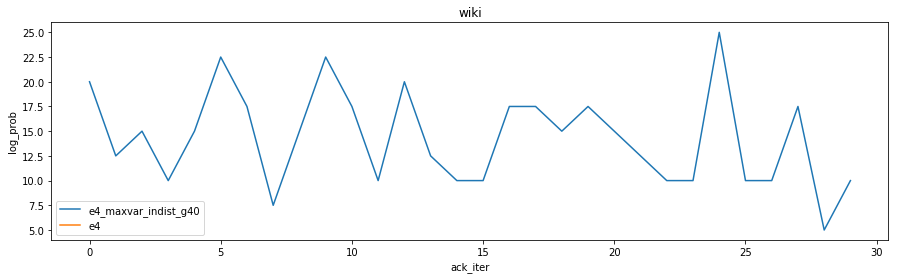

In [331]:
cs.plot_data_vs_ack_iter(
    20,
    filenames,
    'avg_seeds',
    'log_prob',
    lambda x, filename: x['best_gamma'],
    30,
    arrs,
    to_eval,
    legend_loc=3,
)

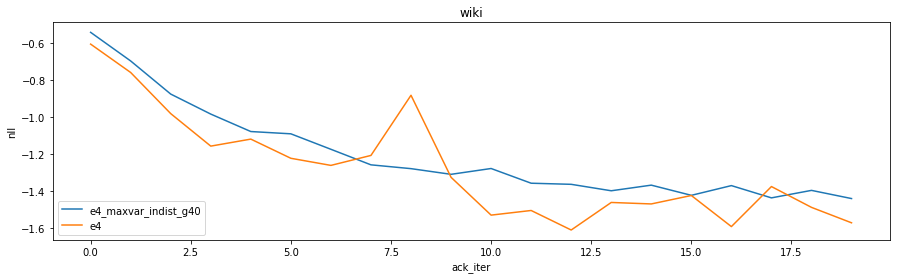

In [330]:
cs.plot_data_vs_ack_iter(
    50,
    filenames,
    'avg_seeds',
    'nll',
    lambda x, filename : x['logging'][1]['best']['nll'],
    20,
    arrs,
    to_eval,
    legend_loc=3,
)

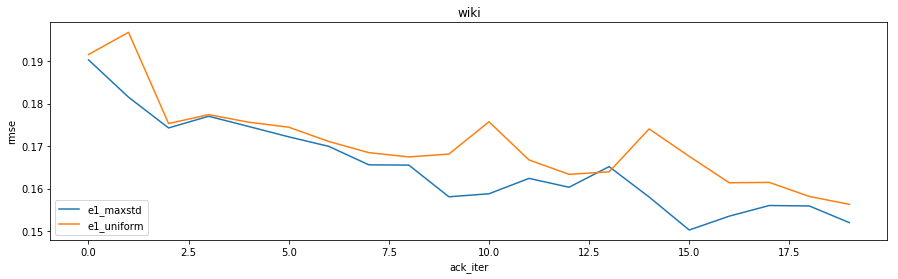

In [198]:
cs.plot_data_vs_ack_iter(
    200,
    filenames,
    'avg_seeds',
    'rmse',
    test_rmse_fn,
    20,
    arrs,
    to_eval,
    legend_loc=3,
)